# Analysis

- **Observed Trend 1**: As latitude approaches zero, temperature tends to increase.
- **Observed Trend 2**: There was no observable pattern to variation in humidity, cloudiness, or wind speed as latitude changed.
- **Observed Trend 3**: There was a noticeable increase in humidity between 0 to 20 degrees South; this is likely because the land mass between these latitudes is largely dominated by rainforest, but more research would need to be done to investigate this hypothesis before drawing conclusions.

# Getting Started: Importing Dependencies

*Note: This code will not work if the citipy package is not installed. Visit https://github.com/wingchen/citipy for more info on this package.

In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import pandas as pd
from citipy import citipy
import numpy as np
import os

# Generating a list of 500+ cities

In [2]:
# Generate a list of 90 latitudes to cover the range from the
# southern-most and northern-most areas of the globe.
latitudes = np.arange(-90, 90, 2)

#Generate a list of 90 longitudes to cover a variety of
# locations ranging from east-west.
longitudes = np.arange(-180, 180, 4)

# Initiate an empty list to hold all city names.
cities = []

# Loop through lat/long lists and for each pairing, generate
# the name of the nearest city using the citipy package.
for latitude in latitudes:
    for longitude in longitudes:
        city = citipy.nearest_city(latitude, longitude).city_name
        # If the most recently generated city isn't in the list of
        # cities, add it.
        if city not in cities:
            cities.append(city)

# Check the list length to make sure we have at least 500 unique cities.
print(str(len(cities)))

2133


# Look up weather data for city list

For each city, find the following:
- Latitude (remember, before we just used a lat/long combination to find the *nearest* city. We would like more precise latitude/long data for each city.
- Longitude
- Temperature (deg. F)
- Humidity (%)
- Cloudiness (%)
- Wind speed (mph)

Print number, name, and URL to a log file for each city as results are generated from the API call. Then save all data retrieved to a csv file.

In [3]:
# Define parameters for API requests
api_key = '16aac2742b26c95c8dbf451537f73963'
endpoint = "http://api.openweathermap.org/data/2.5/weather"
units = 'imperial'

# Set up parameter dictionary
param_dict = {
    'appid': api_key,
    'units': units
}

# Set up lists to hold necessary data.
cities_final = []
lat_data = []
long_data = []
temp_data = []
humidity_data = []
cloud_data = []
wind_data = []

# Initiate a counter to keep track of the number of cities.
i = 0

# Loop through cities and request weather data from OpenWeatherMap API.
for city in cities:
    # Some cities in our list will not be found in the OpenWeatherAPI,
    # so use a try/except statement to handle Key Errors that we'll
    # get when the city is not found.
    try:
        param_dict['q'] = city
        response = req.get(endpoint, params=param_dict)
        city_data = response.json()
        lat_data.append(city_data['coord']['lat'])
        long_data.append(city_data['coord']['lon'])
        temp_data.append(city_data['main']['temp'])
        humidity_data.append(city_data['main']['humidity'])
        cloud_data.append(city_data['clouds']['all'])
        wind_data.append(city_data['wind']['speed'])
        cities_final.append(city)
        i = i+1
        
        # Print results to console
        print('City Number: ' + str(i) +
               '; City Name: ' + city +
               '; Requested URL: ' + endpoint + '?appid=' + api_key + 
                '&units=' + units + '&q=' + city)
        
        # Print city name/number/URL to log file
        output_path = os.path.join('output', 'log.txt')
        log = open(output_path, 'a')
        log.write('City Number: ' + str(i) +
               '; City Name: ' + city +
               '; Requested URL: ' + endpoint + '?appid=' + api_key + 
                '&units=' + units + '&q=' + city + '\n')
        log.close()
    
    # In the event of a Key Error, skip to the next iteration of the loop.
    except KeyError:
        continue

# Check how many cities we were able to get weather data for.
len(cities_final)

City Number: 1; City Name: vaini; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=vaini
City Number: 2; City Name: rikitea; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=rikitea
City Number: 3; City Name: punta arenas; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=punta arenas
City Number: 4; City Name: ushuaia; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ushuaia
City Number: 5; City Name: hermanus; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=hermanus
City Number: 6; City Name: bredasdorp; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bredasdorp
City Number: 7

City Number: 51; City Name: ancud; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ancud
City Number: 52; City Name: puerto montt; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=puerto montt
City Number: 53; City Name: trelew; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=trelew
City Number: 54; City Name: puerto madryn; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=puerto madryn
City Number: 55; City Name: launceston; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=launceston
City Number: 56; City Name: batemans bay; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bat

City Number: 100; City Name: robertson; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=robertson
City Number: 101; City Name: saint-joseph; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=saint-joseph
City Number: 102; City Name: geraldton; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=geraldton
City Number: 103; City Name: collie; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=collie
City Number: 104; City Name: young; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=young
City Number: 105; City Name: sydney; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sydney
City N

City Number: 150; City Name: resistencia; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=resistencia
City Number: 151; City Name: posadas; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=posadas
City Number: 152; City Name: tapejara; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=tapejara
City Number: 153; City Name: florianopolis; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=florianopolis
City Number: 154; City Name: ilhabela; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ilhabela
City Number: 155; City Name: karasburg; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&

City Number: 199; City Name: broome; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=broome
City Number: 200; City Name: emerald; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=emerald
City Number: 201; City Name: gladstone; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=gladstone
City Number: 202; City Name: koumac; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=koumac
City Number: 203; City Name: bourail; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bourail
City Number: 204; City Name: isangel; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=isangel
City Number: 205

City Number: 249; City Name: beira; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=beira
City Number: 250; City Name: morondava; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=morondava
City Number: 251; City Name: marolambo; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=marolambo
City Number: 252; City Name: sainte-suzanne; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sainte-suzanne
City Number: 253; City Name: kununurra; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kununurra
City Number: 254; City Name: bowen; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bowe

City Number: 299; City Name: mount darwin; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=mount darwin
City Number: 300; City Name: phalombe; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=phalombe
City Number: 301; City Name: mahajanga; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=mahajanga
City Number: 302; City Name: tsaratanana; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=tsaratanana
City Number: 303; City Name: antalaha; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=antalaha
City Number: 304; City Name: cap malheureux; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=im

City Number: 349; City Name: alta floresta; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=alta floresta
City Number: 350; City Name: sao miguel do araguaia; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sao miguel do araguaia
City Number: 351; City Name: ibotirama; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ibotirama
City Number: 352; City Name: baixa grande; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=baixa grande
City Number: 353; City Name: aracaju; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=aracaju
City Number: 354; City Name: sao jose da coroa grande; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=1

City Number: 399; City Name: sao felix do xingu; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sao felix do xingu
City Number: 400; City Name: araguaina; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=araguaina
City Number: 401; City Name: urucui; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=urucui
City Number: 402; City Name: ouricuri; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ouricuri
City Number: 403; City Name: toritama; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=toritama
City Number: 404; City Name: itamaraca; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imper

City Number: 449; City Name: kiunga; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kiunga
City Number: 450; City Name: mount hagen; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=mount hagen
City Number: 451; City Name: finschhafen; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=finschhafen
City Number: 452; City Name: kokopo; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kokopo
City Number: 453; City Name: kieta; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kieta
City Number: 454; City Name: auki; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=auki
City Number: 4

City Number: 499; City Name: sao jose de ribamar; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sao jose de ribamar
City Number: 500; City Name: acarau; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=acarau
City Number: 501; City Name: aquiraz; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=aquiraz
City Number: 502; City Name: harper; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=harper
City Number: 503; City Name: mbigou; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=mbigou
City Number: 504; City Name: gamboma; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=gambom

City Number: 549; City Name: aitape; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=aitape
City Number: 550; City Name: hilo; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=hilo
City Number: 551; City Name: coahuayana; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=coahuayana
City Number: 552; City Name: ixtapa; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ixtapa
City Number: 553; City Name: muisne; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=muisne
City Number: 554; City Name: esmeraldas; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=esmeraldas
City Number: 555

City Number: 599; City Name: winneba; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=winneba
City Number: 600; City Name: warri; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=warri
City Number: 601; City Name: berberati; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=berberati
City Number: 602; City Name: bosobolo; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bosobolo
City Number: 603; City Name: bondo; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bondo
City Number: 604; City Name: yambio; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=yambio
City Number: 605; Ci

City Number: 649; City Name: sabang; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sabang
City Number: 650; City Name: sigli; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sigli
City Number: 651; City Name: kuala kedah; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kuala kedah
City Number: 652; City Name: kuala terengganu; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kuala terengganu
City Number: 653; City Name: miri; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=miri
City Number: 654; City Name: kota kinabalu; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kota

City Number: 699; City Name: san rafael del sur; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=san rafael del sur
City Number: 700; City Name: san isidro; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=san isidro
City Number: 701; City Name: portobelo; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=portobelo
City Number: 702; City Name: san onofre; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=san onofre
City Number: 703; City Name: villa del rosario; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=villa del rosario
City Number: 704; City Name: tacarigua; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c9

City Number: 749; City Name: marabba; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=marabba
City Number: 750; City Name: bahir dar; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bahir dar
City Number: 751; City Name: korem; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=korem
City Number: 752; City Name: salalah; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=salalah
City Number: 753; City Name: ponnampet; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ponnampet
City Number: 754; City Name: madras; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=madras
City Number: 7

City Number: 799; City Name: morant bay; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=morant bay
City Number: 800; City Name: guanica; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=guanica
City Number: 801; City Name: middle island; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=middle island
City Number: 802; City Name: saint-francois; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=saint-francois
City Number: 803; City Name: ponta do sol; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ponta do sol
City Number: 804; City Name: ribeira brava; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537

City Number: 849; City Name: mahbubabad; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=mahbubabad
City Number: 850; City Name: srikakulam; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=srikakulam
City Number: 851; City Name: den chai; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=den chai
City Number: 852; City Name: seka; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=seka
City Number: 853; City Name: dong hoi; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=dong hoi
City Number: 854; City Name: catuday; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=catuday
City N

City Number: 900; City Name: ormara; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ormara
City Number: 901; City Name: dwarka; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=dwarka
City Number: 902; City Name: dhola; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=dhola
City Number: 903; City Name: bhikangaon; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bhikangaon
City Number: 904; City Name: waraseoni; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=waraseoni
City Number: 905; City Name: sundargarh; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sundargarh
City Num

City Number: 951; City Name: morgan city; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=morgan city
City Number: 952; City Name: estelle; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=estelle
City Number: 953; City Name: south venice; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=south venice
City Number: 954; City Name: aventura; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=aventura
City Number: 955; City Name: dunmore town; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=dunmore town
City Number: 956; City Name: hamilton; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=impe

City Number: 1001; City Name: phalodi; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=phalodi
City Number: 1002; City Name: narnaul; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=narnaul
City Number: 1003; City Name: pawayan; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=pawayan
City Number: 1004; City Name: waling; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=waling
City Number: 1005; City Name: mangan; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=mangan
City Number: 1006; City Name: tawang; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=tawang
City Number: 100

City Number: 1051; City Name: kushima; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kushima
City Number: 1052; City Name: severo-kurilsk; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=severo-kurilsk
City Number: 1053; City Name: fortuna; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=fortuna
City Number: 1054; City Name: port hueneme; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=port hueneme
City Number: 1055; City Name: ensenada; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ensenada
City Number: 1056; City Name: deming; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=impe

City Number: 1100; City Name: elizabeth city; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=elizabeth city
City Number: 1101; City Name: camacha; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=camacha
City Number: 1102; City Name: casablanca; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=casablanca
City Number: 1103; City Name: karpathos; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=karpathos
City Number: 1104; City Name: balad; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=balad
City Number: 1105; City Name: kashan; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q

City Number: 1150; City Name: korla; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=korla
City Number: 1151; City Name: yumen; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=yumen
City Number: 1152; City Name: lanzhou; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=lanzhou
City Number: 1153; City Name: pingliang; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=pingliang
City Number: 1154; City Name: linfen; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=linfen
City Number: 1155; City Name: yanggu; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=yanggu
City Number: 1156;

City Number: 1200; City Name: zhangye; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=zhangye
City Number: 1201; City Name: wuwei; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=wuwei
City Number: 1202; City Name: yinchuan; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=yinchuan
City Number: 1203; City Name: taiyuan; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=taiyuan
City Number: 1204; City Name: hengshui; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=hengshui
City Number: 1205; City Name: longkou; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=longkou
City Numbe

City Number: 1250; City Name: dandong; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=dandong
City Number: 1251; City Name: linjiang; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=linjiang
City Number: 1252; City Name: tenno; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=tenno
City Number: 1253; City Name: miyako; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=miyako
City Number: 1254; City Name: bethel; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bethel
City Number: 1255; City Name: port hardy; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=port hardy
City Numbe

City Number: 1299; City Name: olga; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=olga
City Number: 1300; City Name: kamiiso; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kamiiso
City Number: 1301; City Name: kushiro; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kushiro
City Number: 1302; City Name: redmond; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=redmond
City Number: 1303; City Name: garden city; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=garden city
City Number: 1304; City Name: rexburg; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=rexburg
City Num

City Number: 1349; City Name: astoria; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=astoria
City Number: 1350; City Name: grandview; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=grandview
City Number: 1351; City Name: lewiston; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=lewiston
City Number: 1352; City Name: butte; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=butte
City Number: 1353; City Name: billings; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=billings
City Number: 1354; City Name: glendive; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=glendive
City

City Number: 1398; City Name: terrace bay; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=terrace bay
City Number: 1399; City Name: chapleau; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=chapleau
City Number: 1400; City Name: kirkland lake; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kirkland lake
City Number: 1401; City Name: senneterre; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=senneterre
City Number: 1402; City Name: price; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=price
City Number: 1403; City Name: channel-port aux basques; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f

City Number: 1447; City Name: sioux lookout; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sioux lookout
City Number: 1448; City Name: hearst; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=hearst
City Number: 1449; City Name: cochrane; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=cochrane
City Number: 1450; City Name: chapais; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=chapais
City Number: 1451; City Name: baie-comeau; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=baie-comeau
City Number: 1452; City Name: havre-saint-pierre; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&unit

City Number: 1496; City Name: youghal; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=youghal
City Number: 1497; City Name: carmarthen; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=carmarthen
City Number: 1498; City Name: hertford; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=hertford
City Number: 1499; City Name: monster; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=monster
City Number: 1500; City Name: sassenberg; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sassenberg
City Number: 1501; City Name: zerbst; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=zerbs

City Number: 1545; City Name: jever; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=jever
City Number: 1546; City Name: bad doberan; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bad doberan
City Number: 1547; City Name: bialogard; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bialogard
City Number: 1548; City Name: morag; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=morag
City Number: 1549; City Name: druskininkai; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=druskininkai
City Number: 1550; City Name: minsk; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=minsk


City Number: 1594; City Name: sobinka; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sobinka
City Number: 1595; City Name: zvenigovo; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=zvenigovo
City Number: 1596; City Name: grakhovo; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=grakhovo
City Number: 1597; City Name: starobaltachevo; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=starobaltachevo
City Number: 1598; City Name: nizhniy ufaley; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=nizhniy ufaley
City Number: 1599; City Name: armizonskoye; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f

City Number: 1643; City Name: tobolsk; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=tobolsk
City Number: 1644; City Name: tevriz; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=tevriz
City Number: 1645; City Name: kedrovyy; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kedrovyy
City Number: 1646; City Name: molchanovo; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=molchanovo
City Number: 1647; City Name: teguldet; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=teguldet
City Number: 1648; City Name: pirovskoye; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=pirovsk

City Number: 1693; City Name: yerbogachen; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=yerbogachen
City Number: 1694; City Name: vitim; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=vitim
City Number: 1695; City Name: lensk; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=lensk
City Number: 1696; City Name: nizhniy kuranakh; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=nizhniy kuranakh
City Number: 1697; City Name: mokhsogollokh; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=mokhsogollokh
City Number: 1698; City Name: amga; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=im

City Number: 1742; City Name: klaebu; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=klaebu
City Number: 1743; City Name: ostersund; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ostersund
City Number: 1744; City Name: umea; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=umea
City Number: 1745; City Name: ylivieska; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=ylivieska
City Number: 1746; City Name: kajaani; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=kajaani
City Number: 1747; City Name: muyezerskiy; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=muyezerskiy
Ci

City Number: 1791; City Name: batagay; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=batagay
City Number: 1792; City Name: zyryanka; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=zyryanka
City Number: 1793; City Name: srednekolymsk; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=srednekolymsk
City Number: 1794; City Name: cherskiy; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=cherskiy
City Number: 1795; City Name: bilibino; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=bilibino
City Number: 1796; City Name: aklavik; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=

City Number: 1840; City Name: narsaq; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=narsaq
City Number: 1841; City Name: longyearbyen; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=longyearbyen
City Number: 1842; City Name: sovetskiy; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=sovetskiy
City Number: 1843; City Name: berlevag; Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=16aac2742b26c95c8dbf451537f73963&units=imperial&q=berlevag


1843

In [4]:
weather_df = pd.DataFrame(data={'City':cities_final,
                                'Latitude':lat_data,
                                'Longitude':long_data,
                                'Temperature':temp_data,
                                'Humidity':humidity_data,
                                'Cloudiness':cloud_data,
                                'Wind Speed':wind_data})
weather_df['Date'] = ['12/10/2017' for city in weather_df['City']]
weather_df.head()

,City,Cloudiness,Humidity,Latitude,Longitude,Temperature,Wind Speed,Date
0,vaini,20,65,-21.20,-175.20,80.60,9.17,12/10/2017
1,rikitea,76,100,-23.12,-134.97,77.14,19.42,12/10/2017
2,punta arenas,75,81,-53.15,-70.92,46.40,5.82,12/10/2017
3,ushuaia,40,75,-54.80,-68.30,44.60,4.70,12/10/2017
4,hermanus,0,96,-34.42,19.23,44.74,3.60,12/10/2017


In [5]:
# Save data to csv
output_path = os.path.join('output', 'weather_data.csv')
weather_df.to_csv(output_path)

# Create graphs to visualize trends

Create the following plots:
- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude

Save pngs for each plot.

## Latitude vs. Temperature

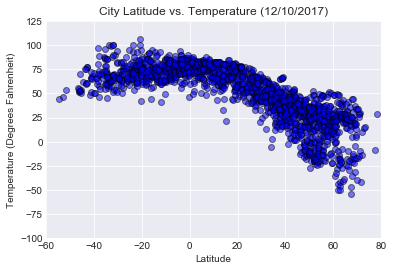

In [7]:
# Generate plot using latitude and temperature data.
plt.scatter(weather_df['Latitude'], weather_df['Temperature'],
            color='b', edgecolor='black', alpha=.5)

# Give the plot a title.
plt.title('City Latitude vs. Temperature (12/10/2017)')

# Label the x- and y-axes.
plt.xlabel('Latitude')
plt.ylabel('Temperature (Degrees Fahrenheit)')

# Set x- and y-limits.
plt.xlim(-60, 80)
plt.ylim(-100, 125)

# Use seaborn library to set the grid background style.
sns.set_style('darkgrid')

# Save chart as a PNG and display
output_path = os.path.join('output', '01_latitude-vs-temperature.png')
plt.savefig(output_path, dpi=100)
plt.show()

## Latitude vs. Humidity

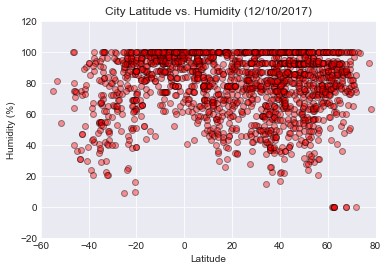

In [8]:
# Generate plot using latitude and temperature data.
plt.scatter(weather_df['Latitude'], weather_df['Humidity'],
            color='r', edgecolor='black', alpha=.4)

# Give the plot a title.
plt.title('City Latitude vs. Humidity (12/10/2017)')

# Label the x- and y-axes.
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set x- and y-limits.
plt.xlim(-60, 80)
plt.ylim(-20, 120)

# Use seaborn library to set the grid background style.
sns.set_style('darkgrid')

# Save chart as a PNG and display
output_path = os.path.join('output', '02_latitude-vs-humidity.png')
plt.savefig(output_path, dpi=100)
plt.show()

## Latitude vs. Cloudiness

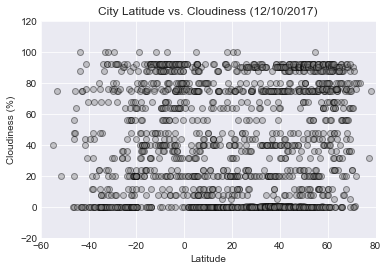

In [9]:
# Generate plot using latitude and temperature data.
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'],
            color='grey', edgecolor='black', alpha=.4)

# Give the plot a title.
plt.title('City Latitude vs. Cloudiness (12/10/2017)')

# Label the x- and y-axes.
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set x- and y-limits.
plt.xlim(-60, 80)
plt.ylim(-20, 120)

# Use seaborn library to set the grid background style.
sns.set_style('darkgrid')

# Save chart as a PNG and display
output_path = os.path.join('output', '03_latitude-vs-cloudiness.png')
plt.savefig(output_path, dpi=100)
plt.show()

## Latitude vs. Wind Speed

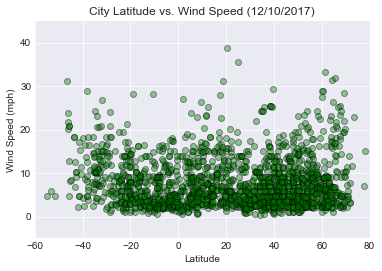

In [10]:
# Generate plot using latitude and temperature data.
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'],
            color='green', edgecolor='black', alpha=.4)

# Give the plot a title.
plt.title('City Latitude vs. Wind Speed (12/10/2017)')

# Label the x- and y-axes.
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set x- and y-limits.
plt.xlim(-60, 80)
plt.ylim(-5, 45)

# Use seaborn library to set the grid background style.
sns.set_style('darkgrid')

# Save chart as a PNG and display
output_path = os.path.join('output', '04_latitude-vs-wind-speed.png')
plt.savefig(output_path, dpi=100)
plt.show()